In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

### Step 1: Data Exploration and Cleaning

#### 1.1 Load the Dataset

In [8]:
# import dataset 
data = pd.read_csv('Mall_Customers.csv')

In [9]:
# display first few rows 
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### 1.2 Explore the Data

In [10]:
# check number of rows
data.shape

(200, 5)

In [11]:
# check for missing values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
# check for duplicate values 
data.duplicated().sum()

0

In [16]:
# check distribution of different features and ranges 
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### 1.3 Visualize Distributions

In [ ]:
# plot histogram for numerical features 
data.hist(bins=30, figsize=(15, 10))
plt.show()

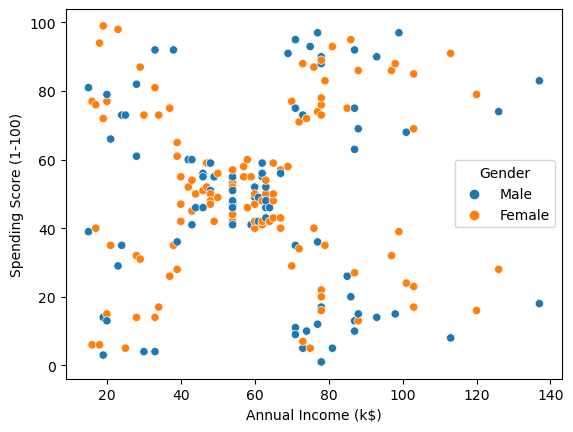

In [18]:
# visualize the relationship between income and spending score based on gender
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.show()

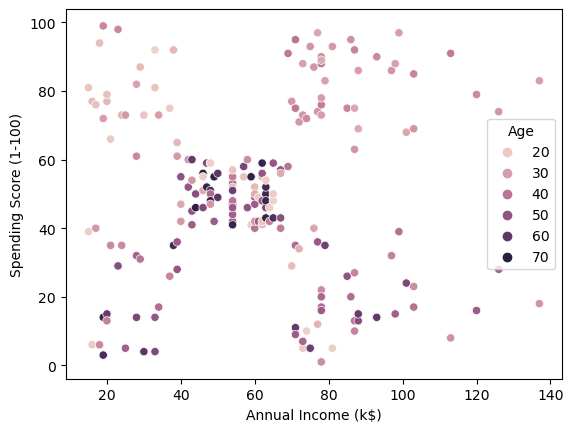

In [19]:
# visualize the relationship between income and spending score based on age
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Age')
plt.show()

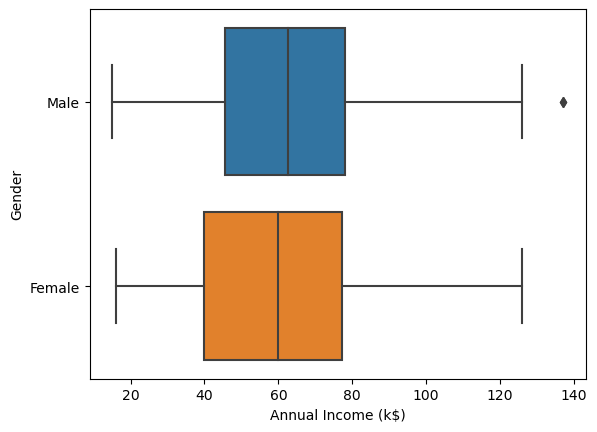

In [25]:
# visualize distribution of Annual Income (k$) by gender using box plot
sns.boxplot(data=data, x='Annual Income (k$)', 
           y='Gender')
plt.show()

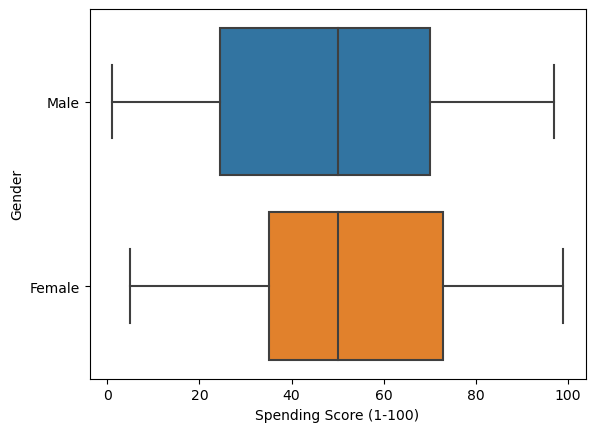

In [27]:
# visualize distribution of 'Spending Score (1-100)' by gender using box plot
sns.boxplot(data=data, x='Spending Score (1-100)', 
           y='Gender')
plt.show()

### Step 2: Data Preprocessing

#### 2.1 Normaliztion (Scaling the Features)

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
# Select relevant features
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the features
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

# convert back to a DataFrame
normalized_data = pd.DataFrame(normalized_features, columns=['Annual Income', 'Spending Score'])
normalized_data.head()

,Annual Income,Spending Score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


### Step 3: Hierarchical Clustering

#### 3.1 Linkage and Dendrogram

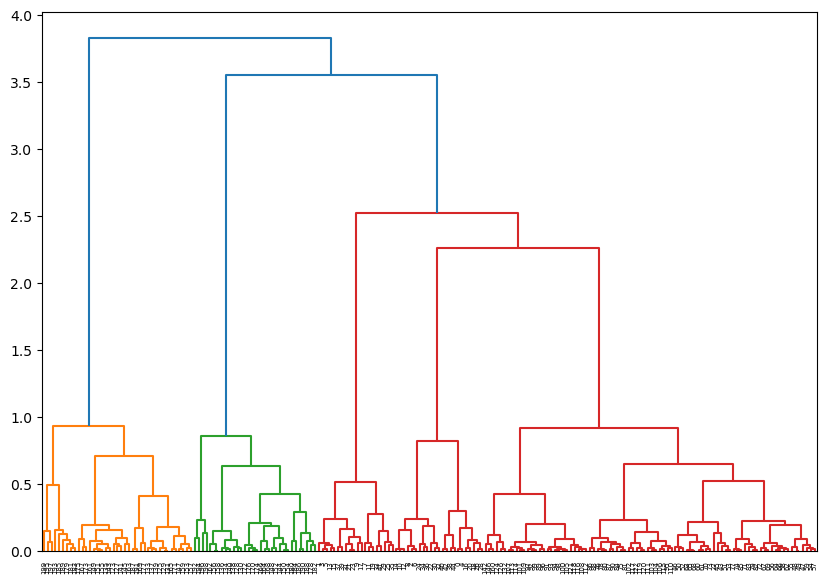

In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Perform linkage
Z = linkage(normalized_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10,7))
dendrogram(Z)
plt.show()

#### 3.2 Form Clusters

In [45]:
from scipy.cluster.hierarchy import fcluster

# Form clusters (cut the dendrogram at a certain distance)
clusters = fcluster(Z, 5, criterion='maxclust')

# Add cluster labels to the dataset
data['Cluster'] = clusters

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

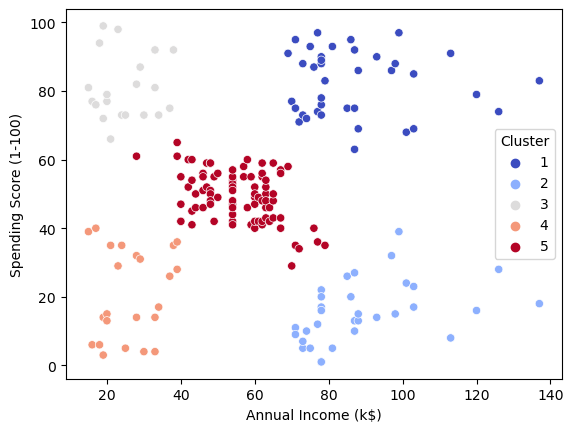

In [47]:
sns.scatterplot(data=data, x='Annual Income (k$)',  y='Spending Score (1-100)', hue='Cluster',
               palette='coolwarm')

### Step 4: K-Means Clutering

#### 4.1 Perform K-Means

In [37]:
from sklearn.cluster import KMeans

# Perform KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(normalized_data)

# Add the cluster labels to the dataset
data['KMeans_Cluster'] = kmeans.labels_

# check cluster centers
kmeans.cluster_centers_

array([[0.32866853, 0.49340468],
       [0.58638083, 0.82783883],
       [0.6       , 0.16443149],
       [0.08792846, 0.79962894],
       [0.08792846, 0.19619666]])

#### 4.2 Elbow Method

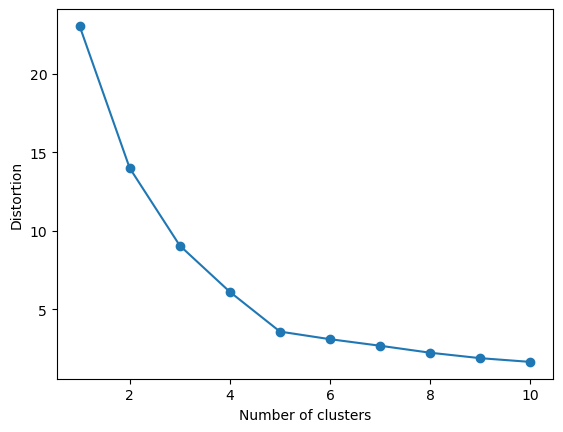

In [40]:
# plot the elbow curve
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(normalized_data)
    distortions.append(km.inertia_)
    
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

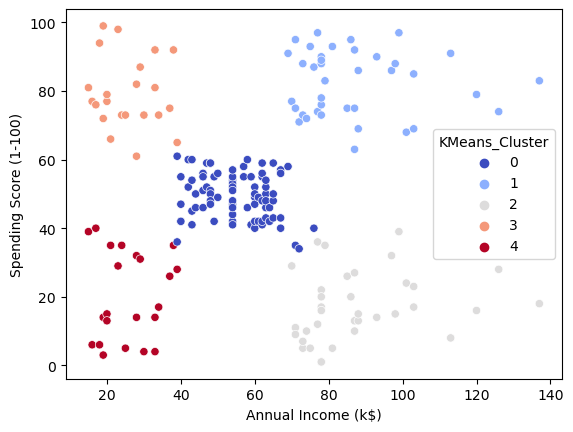

In [44]:
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster',
               palette='coolwarm')